In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [3]:
Fifa=pd.read_csv("fifa_stats.csv")

In [5]:
Fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


# 1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information, which includes height; weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

In [9]:
Fifa.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [13]:
Fifa["Club"]

0              FC Barcelona
1                  Juventus
2       Paris Saint-Germain
3         Manchester United
4           Manchester City
               ...         
1995            River Plate
1996                  Genoa
1997         Houston Dynamo
1998            Club Necaxa
1999           Club Tijuana
Name: Club, Length: 2000, dtype: object

In [14]:
Fifa["Club"].value_counts()

Chelsea                    24
Liverpool                  23
Manchester United          23
Borussia Dortmund          23
Napoli                     23
                           ..
Real Sporting de GijÃ³n     1
SV Zulte-Waregem            1
Real Oviedo                 1
Boavista FC                 1
Club Necaxa                 1
Name: Club, Length: 285, dtype: int64

In [20]:
Fifa["Club"].replace({np.nan:"Chelsea"},inplace=True)

In [22]:
Fifa["Club"].value_counts()

Chelsea                    43
Liverpool                  23
Manchester United          23
Borussia Dortmund          23
Napoli                     23
                           ..
Real Sporting de GijÃ³n     1
SV Zulte-Waregem            1
Real Oviedo                 1
Boavista FC                 1
Club Necaxa                 1
Name: Club, Length: 285, dtype: int64

In [31]:
Fifa["Name"].value_counts()

Danilo           3
Marcelo          3
Paulinho         3
J. Cuadrado      2
OtÃ¡vio          2
                ..
Escudero         1
C. Tosun         1
Jaume Costa      1
G. Pezzella      1
D. RodrÃ­guez    1
Name: Name, Length: 1970, dtype: int64

### a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

In [35]:
Fifa["Age"].shape  #Population Size
Fifa["Age"].mean() #Population Mean
Fifa["Age"].std()  #Population Std Deviaation

3.8590612753574423

In [36]:
from scipy.stats import sem

In [38]:
sample_age=Fifa["Age"].head(200)  #200 rows

In [39]:
sem(sample_age)   # St Eroor

0.25032616913693595

In [40]:
sample_age.mean()   #Sample Age Mean

27.495

In [41]:
#As We Increse Sample Size Sample Represent close to population.

### b)	Is there any evidence that the players overall rating is greater than 80?

In [42]:
Fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [47]:
Fifa[["Overall_rating"]].describe()
#We can say maximum value overroll rating is greter than 80

,Overall_rating
count,2000.000000
mean,78.197000
std,3.285969
min,75.000000
25%,76.000000
50%,77.000000
75%,80.000000
max,94.000000


In [ ]:
#Ho:Avg rating=<80
#Ha:Avg rating>80


In [56]:
Z_critcal=stats.norm.isf(0.05)   #Critical Value=1.6448536 (it is lest tale )
Z_critcal

from statsmodels.stats.weightstats import ztest as ztest
ztest(Fifa["Overall_rating"],value=80)   #ztest statistic=-24.538460498672645

(-24.538460498672062, 5.743728565608358e-133)

In [60]:
ztest=(Fifa["Overall_rating"].mean()-80)/(Fifa["Overall_rating"].std()/np.sqrt(2000))
ztest

-24.538460498672645

In [61]:
#p_value is less than 5% so we reject the Null Hypothis There is eveidence 
#that player overroll rating is greater than 80 

### c)Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [62]:
# Ho:preferred foot has does not any impact on potential
# Ha:preferred foot has any impact on potential

In [63]:
Fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [67]:
#critical value=5.031467946607999
stats.f.isf.(0.05/2,1,1998)



left=Fifa.loc[Fifa["Preferred Foot"]=="Left",["Potential"]]
right=Fifa.loc[Fifa["Preferred Foot"]=="Right",["Potential"]]
stats.f_oneway(left,right)

F_onewayResult(statistic=array([2.36484035]), pvalue=array([0.12425495]))

In [71]:
#since p value is greater than alfa so we fail to reject the null hypothisis so 
#that we can say preffered foot dosent impact potentail

<AxesSubplot:xlabel='Preferred_Foot'>

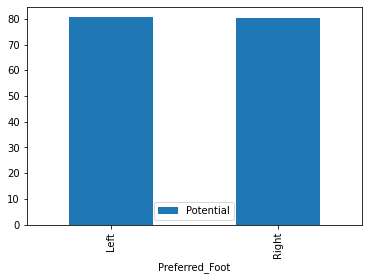

In [102]:
Fifa.groupby("Preferred_Foot").mean()[["Potential"]].plot(kind="bar")

In [72]:
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm


Fifa["Preferred_Foot"]=Fifa["Preferred Foot"]
model=sfa.ols("Potential~Preferred_Foot",data=Fifa).fit()
print(anova_lm(model))

                    df        sum_sq    mean_sq        F    PR(>F)
Preferred_Foot     1.0     39.999624  39.999624  2.36484  0.124255
Residual        1998.0  33794.775876  16.914302      NaN       NaN


### d) Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

In [84]:
Fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight,Preferred_Foot
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159,Left
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183,Right
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150,Right
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168,Right
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154,Right


In [94]:
#Ho:No relation between the overrall rating and potentail
#Ha:relation between the overrall rating and potentail
    
stats.ttest_ind(Fifa["Overall_rating"],Fifa["Potential"])

#since p value is much less than alfa thus we reject the null hypothisis
#we can say overall ratings of player depends on his potential

Ttest_indResult(statistic=-17.89175319557915, pvalue=6.241604310936382e-69)

### e)	Does skill move have any effect in overall rating? Perform the graphical analysis and the statistical analysis

In [100]:
#Ho:No relation between the overrall rating and Skill Moves
#Ha:relation between the overrall rating and Skill Moves

import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm


Fifa["Skill_Moves"]=Fifa["Skill Moves"]
model=sfa.ols("Overall_rating~Skill_Moves",data=Fifa).fit()
print(anova_lm(model))

#since p value is much less than alfa thus we reject the null hypothisis
#we can say overall ratings of player depends on his skill moves




                 df        sum_sq     mean_sq          F    PR(>F)
Skill_Moves     1.0    143.697945  143.697945  13.390827  0.000259
Residual     1998.0  21440.684055   10.731073        NaN       NaN


<AxesSubplot:xlabel='Skill_Moves', ylabel='Overall_rating'>

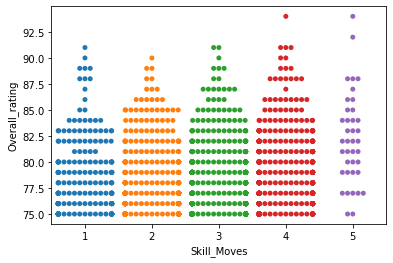

In [113]:
sns.swarmplot(Fifa["Skill_Moves"],Fifa["Overall_rating"])

#Thus skill moves increse the maximaum values of overall ratings aslo increse

# 2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, and messages of various network. Data Cleaning and basic EDA process needs to be performed. 

In [116]:
phone=pd.read_csv("phone.csv")
phone.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [117]:
phone.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

In [118]:
phone.shape

(820, 6)

### a). With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.

In [133]:
mean_d=phone.duration.mean()  #mean_d=144.30493555983546
st_error=phone.std()/np.sqrt(phone.shape[0]) #st_error=1.595486

CI_1=stats.norm.interval(0.95,mean_d,st_error)
print("CI_1:-",CI_1)



mean_d=phone.duration.mean()  #mean_d=144.30493555983546
st_error=phone.std()/np.sqrt(phone.shape[0]) #st_error=1.595486

CI_2=stats.norm.interval(0.99,mean_d,st_error)
print("CI_2:-",CI_2)


#CI on 99% is wider 

CI_1:- (array([141.17783973]), array([147.43203139]))
CI_2:- (array([140.195235]), array([148.41463612]))


### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

In [134]:
phone["network"].value_counts()

Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [174]:
#Ho:networks are equally distributed in the dataset
#Ha:networks are not  equally distributed in the dataset
phone.network.value_counts()
#H0: Count(Vodafone)=Count(Three)=Count(data) etc
#H1: Count(Vodafone)!=Count(Three)!=Count(data)
phone["network_count"]=phone["network"].replace({"Vodafone":215,"Three":215,"data":150,"Meteor":87,"Tesco":84,"landline":42,"voicemail":27})
phone["network_count"]
data=phone.loc[phone["network"]=="data","network_count"]
vodafone=phone.loc[phone["network"]=="Vodafone","network_count"]
three=phone.loc[phone["network"]=="Three","network_count"]
meteor=phone.loc[phone["network"]=="Meteor","network_count"]
tesco=phone.loc[phone["network"]=="Tesco","network_count"]
landline=phone.loc[phone["network"]=="landline","network_count"]
voicemail=phone.loc[phone["network"]=="voicemail","network_count"]
stats.f_oneway(data,vodafone,three,meteor,tesco,landline,voicemail)

# p value is less than alpha thus we "Reject the null hypothesis" and so the data is not equally distributed.


F_onewayResult(statistic=inf, pvalue=0.0)

### c)  Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph

<AxesSubplot:xlabel='network'>

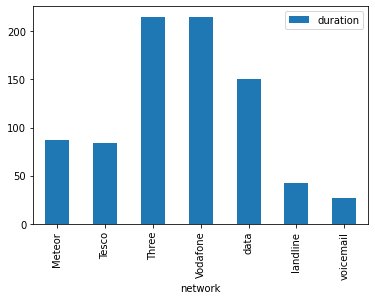

In [157]:
phone.groupby("network").count()[["duration"]].plot(kind="bar")

#Total call duration is highest(three and vodafone ) followed by data meaning these are 
#provide better services

### d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required

In [159]:
#Ho:no relation between item and duration
#Ha:item and duration has significant relation
model=sfa.ols("duration~item",data=phone).fit()
print(anova_lm(model))

#infrence-p_value is greater than to the Significance level so we fail to reject null 
#hypothisis
#so-no relation between item and duration

             df        sum_sq      mean_sq         F    PR(>F)
item        2.0  8.044792e+03  4022.395964  1.931396  0.145607
Residual  817.0  1.701514e+06  2082.636053       NaN       NaN


### e)	Perform statistical tests to identify the relation between network and network_type.

In [169]:
#Ho:no relation between network and network_type
#Ha:relation between network and network_type

phone[["network","network_type"]]

critical_value=stats.chi2.isf(0.05,1)
print(critical_value)

3.8414588206941285


In [173]:
table1=pd.crosstab(phone.network,phone.network_type)
teststas,pvalue,df,exp_val=stats.chi2_contingency(table1)
print(teststas,pvalue)

2460.0 0.0


In [175]:
#we reject the null hypothisis there is no relation between network and network_type